<a href="https://colab.research.google.com/github/SACHINMISHRA12DIRECTORY/My-Data-Science-Projects/blob/main/Electric_Vehicle_Population_in_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
df = pd.read_csv("data.csv");

In [ ]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,E.V_Type,CAFV,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMAB3FV3P,Kitsap,Seabeck,WA,98380.0,2023,TOYOTA,RAV4 PRIME,PHEV,known,42.0,0.0,35.0,240684006,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10
1,1N4AZ1CP6J,Kitsap,Bremerton,WA,98312.0,2018,NISSAN,LEAF,BEV,known,151.0,0.0,35.0,474183811,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,5.303508e+10
2,5YJ3E1EA4L,King,Seattle,WA,98101.0,2020,TESLA,MODEL 3,BEV,known,266.0,0.0,43.0,113120017,POINT (-122.3340795 47.6099315),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP8E,King,Seattle,WA,98125.0,2014,NISSAN,LEAF,BEV,known,84.0,0.0,46.0,108188713,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
4,1G1FX6S00H,Thurston,Yelm,WA,98597.0,2017,CHEVROLET,BOLT EV,BEV,known,238.0,0.0,20.0,176448940,POINT (-122.5715761 46.9095798),PUGET SOUND ENERGY INC,5.306701e+10


In [ ]:
df.shape

(205439, 17)

In [ ]:
df.columns    # E.v_Type is my target variable

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'E.V_Type', 'CAFV', 'Electric Range', 'Base MSRP',
       'Legislative District', 'DOL Vehicle ID', 'Vehicle Location',
       'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
VIN (1-10),0
County,3
City,3
State,0
Postal Code,3
Model Year,0
Make,0
Model,1
E.V_Type,0
CAFV,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205439 entries, 0 to 205438
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   VIN (1-10)            205439 non-null  object 
 1   County                205436 non-null  object 
 2   City                  205436 non-null  object 
 3   State                 205439 non-null  object 
 4   Postal Code           205436 non-null  float64
 5   Model Year            205439 non-null  int64  
 6   Make                  205439 non-null  object 
 7   Model                 205438 non-null  object 
 8   E.V_Type              205439 non-null  object 
 9   CAFV                  205439 non-null  object 
 10  Electric Range        205431 non-null  float64
 11  Base MSRP             205431 non-null  float64
 12  Legislative District  204997 non-null  float64
 13  DOL Vehicle ID        205439 non-null  int64  
 14  Vehicle Location      205431 non-null  object 
 15  

In [ ]:
df['E.V_Type'].value_counts()


,count
E.V_Type,
BEV,161539
PHEV,43900


**EDA**

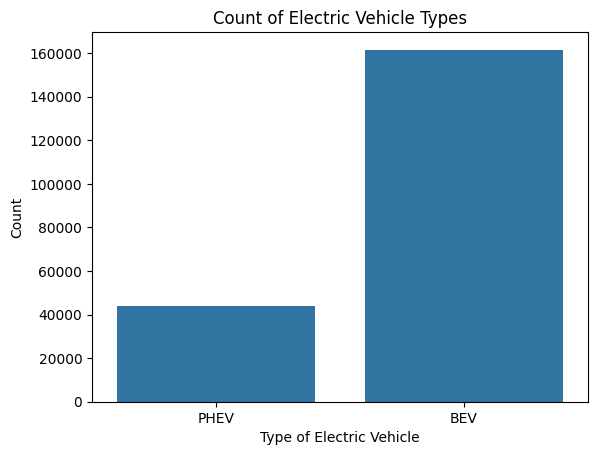

In [ ]:
sns.countplot(data=df, x='E.V_Type')
plt.title('Count of Electric Vehicle Types')
plt.xlabel('Type of Electric Vehicle')
plt.ylabel('Count')
plt.show()


Plug-in Hybrid Electric Vehicle

Battery Electric Vehicle

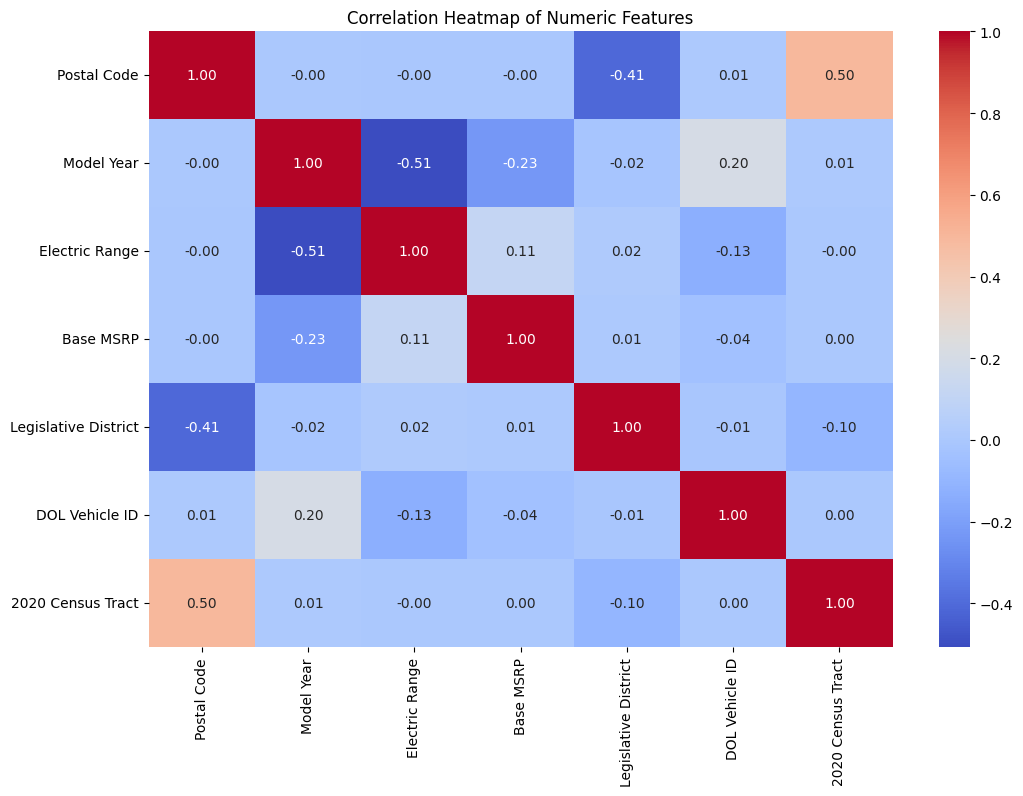

In [ ]:
# using only numerical data

# Step 1: Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Step 2: Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Step 3: Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


It was no use

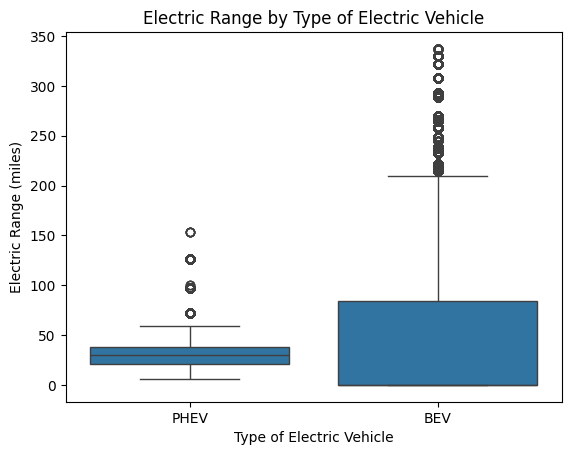

In [ ]:
sns.boxplot(data=df, x='E.V_Type', y='Electric Range')
plt.title('Electric Range by Type of Electric Vehicle')
plt.xlabel('Type of Electric Vehicle')
plt.ylabel('Electric Range (miles)')
plt.show()


In [ ]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)


Numerical Columns: ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', '2020 Census Tract']
Categorical Columns: ['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model', 'E.V_Type', 'CAFV', 'Vehicle Location', 'Electric Utility']


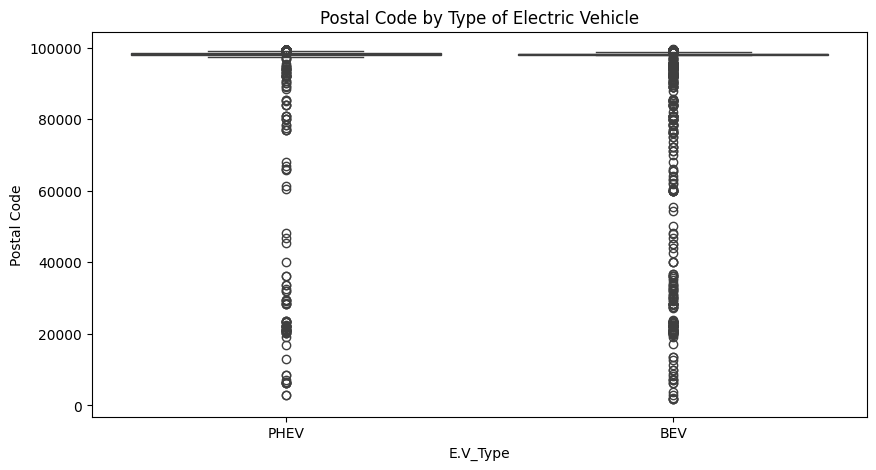

Kruskal-Wallis test for Postal Code: H-statistic=nan, p-value=nan

--------------------------------------------------



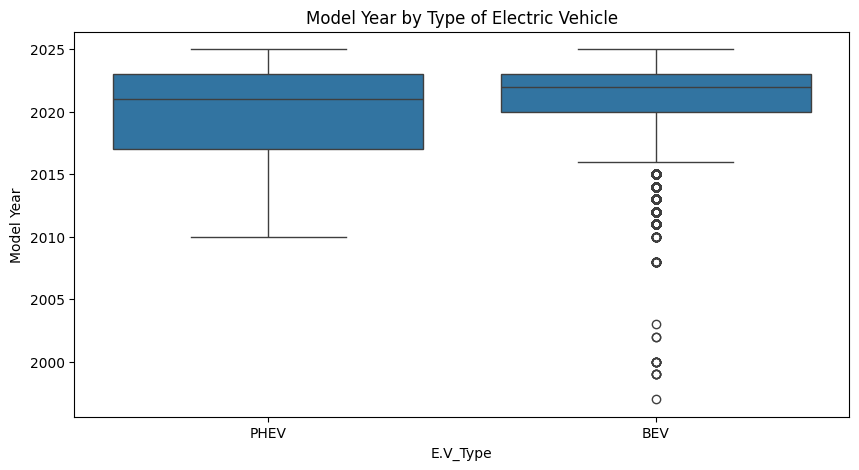

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 205439.
  res = hypotest_fun_out(*samples, **kwds)


Kruskal-Wallis test for Model Year: H-statistic=2664.2656032014065, p-value=0.0

--------------------------------------------------



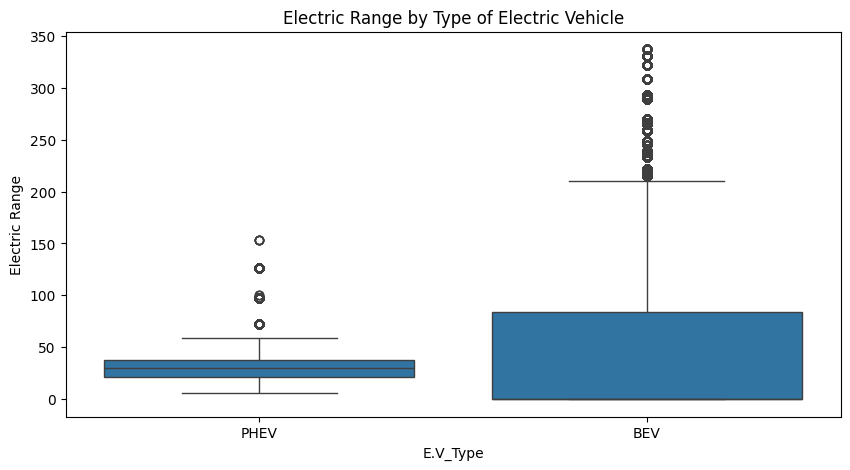

Kruskal-Wallis test for Electric Range: H-statistic=nan, p-value=nan

--------------------------------------------------



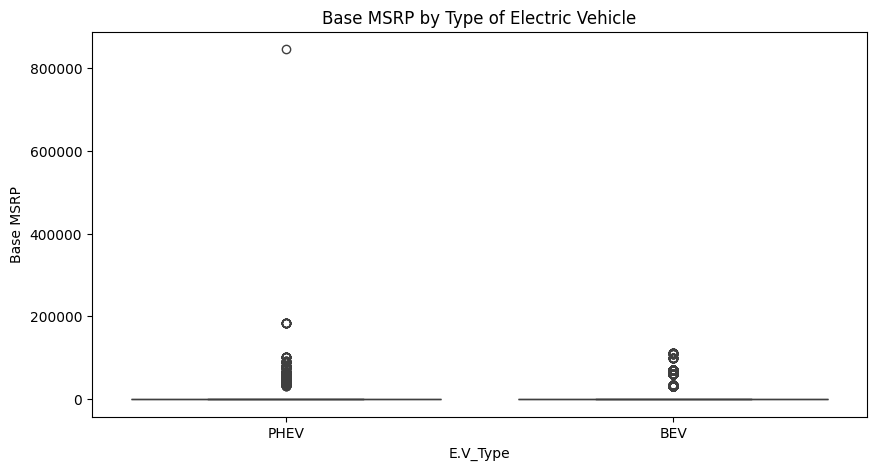

Kruskal-Wallis test for Base MSRP: H-statistic=nan, p-value=nan

--------------------------------------------------



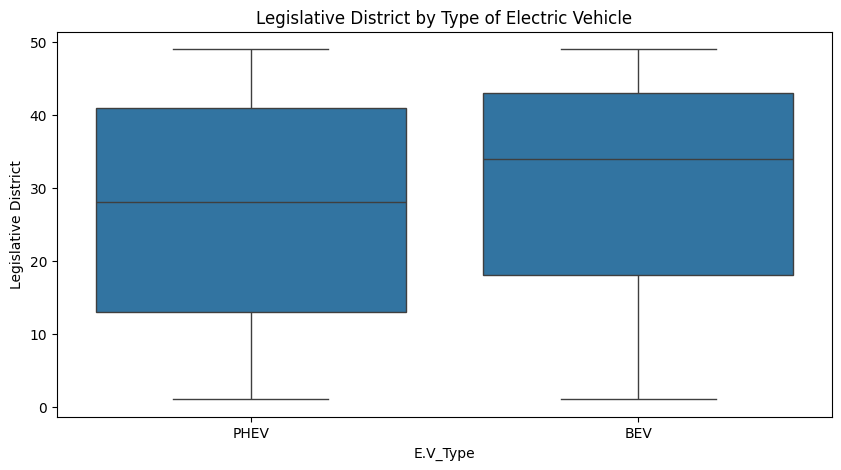

Kruskal-Wallis test for Legislative District: H-statistic=nan, p-value=nan

--------------------------------------------------



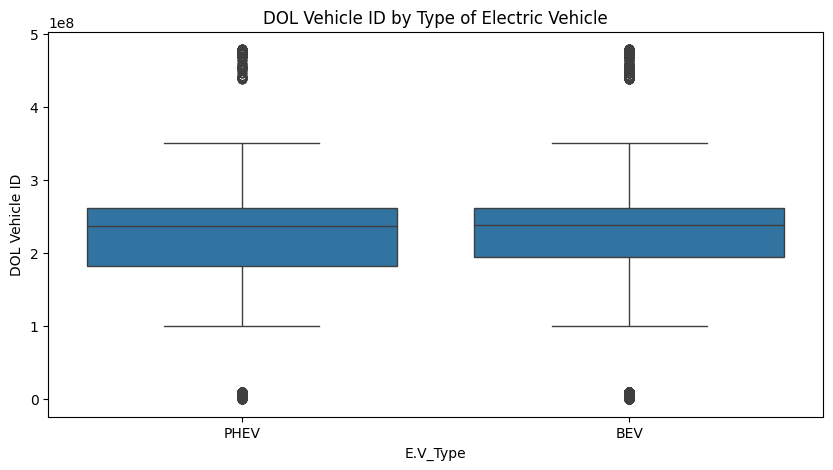

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 205439.
  res = hypotest_fun_out(*samples, **kwds)


Kruskal-Wallis test for DOL Vehicle ID: H-statistic=76.62345630989876, p-value=2.0686793192651407e-18

--------------------------------------------------



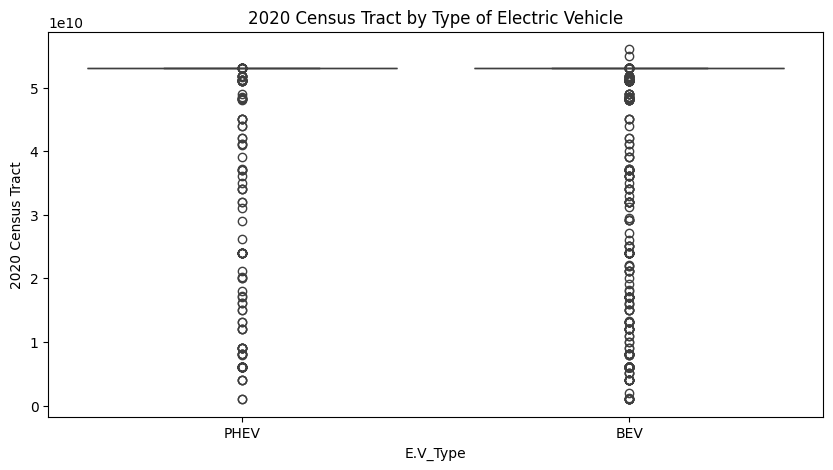

Kruskal-Wallis test for 2020 Census Tract: H-statistic=nan, p-value=nan

--------------------------------------------------



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Assuming 'df' is your DataFrame and 'E.v_Type' is the target variable
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Iterate over numerical columns
for col in numerical_cols:
    # Boxplot for visual analysis
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='E.V_Type', y=col, data=df)
    plt.title(f'{col} by Type of Electric Vehicle')
    plt.show()

    # Perform statistical test (ANOVA if normal distribution, Kruskal-Wallis otherwise)
    groups = [group[col].values for name, group in df.groupby('E.V_Type')]

    # Check for normality (Shapiro-Wilk test)
    _, p_value = stats.shapiro(df[col])

    if p_value > 0.05:  # Data is normally distributed
        f_statistic, p_value = stats.f_oneway(*groups)
        print(f'ANOVA test for {col}: F-statistic={f_statistic}, p-value={p_value}')
    else:  # Data is not normally distributed
        h_statistic, p_value = stats.kruskal(*groups)
        print(f'Kruskal-Wallis test for {col}: H-statistic={h_statistic}, p-value={p_value}')

    print("\n" + "-"*50 + "\n")


# **FEATURE ENGINEERING**


In [ ]:
import pandas as pd

# Example DataFrame
# df = pd.read_csv('your_data.csv') # Load your DataFrame if not already loaded

# Fill missing values
for column in df.columns:
    if df[column].isnull().sum() > 0:  # Check if the column has missing values
        if df[column].dtype == 'object':  # Categorical column
            df[column].fillna(df[column].mode()[0], inplace=True)  # Fill with mode
        else:  # Numerical column
            df[column].fillna(df[column].mean(), inplace=True)  # Fill with mean

# Check for missing values after imputation
missing_values = df.isnull().sum()
print("Missing values after imputation:")
print(missing_values[missing_values > 0])  # Display columns with missing values if any

# Optionally, display the updated DataFrame
print(df.head())


<ipython-input-23-0ca05f931f90>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)  # Fill with mode
<ipython-input-23-0ca05f931f90>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

Missing values after imputation:
Series([], dtype: int64)
   VIN (1-10)    County       City State  Postal Code  Model Year       Make  \
0  JTMAB3FV3P    Kitsap    Seabeck    WA      98380.0        2023     TOYOTA   
1  1N4AZ1CP6J    Kitsap  Bremerton    WA      98312.0        2018     NISSAN   
2  5YJ3E1EA4L      King    Seattle    WA      98101.0        2020      TESLA   
3  1N4AZ0CP8E      King    Seattle    WA      98125.0        2014     NISSAN   
4  1G1FX6S00H  Thurston       Yelm    WA      98597.0        2017  CHEVROLET   

        Model E.V_Type   CAFV  Electric Range  Base MSRP  \
0  RAV4 PRIME     PHEV  known            42.0        0.0   
1        LEAF      BEV  known           151.0        0.0   
2     MODEL 3      BEV  known           266.0        0.0   
3        LEAF      BEV  known            84.0        0.0   
4     BOLT EV      BEV  known           238.0        0.0   

   Legislative District  DOL Vehicle ID                 Vehicle Location  \
0                  35.0 

In [ ]:
df.isnull().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
E.V_Type,0
CAFV,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205439 entries, 0 to 205438
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   VIN (1-10)            205439 non-null  object 
 1   County                205439 non-null  object 
 2   City                  205439 non-null  object 
 3   State                 205439 non-null  object 
 4   Postal Code           205439 non-null  float64
 5   Model Year            205439 non-null  int64  
 6   Make                  205439 non-null  object 
 7   Model                 205439 non-null  object 
 8   E.V_Type              205439 non-null  object 
 9   CAFV                  205439 non-null  object 
 10  Electric Range        205439 non-null  float64
 11  Base MSRP             205439 non-null  float64
 12  Legislative District  205439 non-null  float64
 13  DOL Vehicle ID        205439 non-null  int64  
 14  Vehicle Location      205439 non-null  object 
 15  

In [ ]:
# Dropping irrelevant columns
columns_to_drop = ['VIN (1-10)', 'State', 'Vehicle Location']
df.drop(columns=columns_to_drop, inplace=True)

# Check updated DataFrame
print(df.head())


     County       City  Postal Code  Model Year       Make       Model  \
0    Kitsap    Seabeck      98380.0        2023     TOYOTA  RAV4 PRIME   
1    Kitsap  Bremerton      98312.0        2018     NISSAN        LEAF   
2      King    Seattle      98101.0        2020      TESLA     MODEL 3   
3      King    Seattle      98125.0        2014     NISSAN        LEAF   
4  Thurston       Yelm      98597.0        2017  CHEVROLET     BOLT EV   

  E.V_Type   CAFV  Electric Range  Base MSRP  Legislative District  \
0     PHEV  known            42.0        0.0                  35.0   
1      BEV  known           151.0        0.0                  35.0   
2      BEV  known           266.0        0.0                  43.0   
3      BEV  known            84.0        0.0                  46.0   
4      BEV  known           238.0        0.0                  20.0   

   DOL Vehicle ID                              Electric Utility  \
0       240684006                        PUGET SOUND ENERGY INC   


In [ ]:
df.head()

,County,City,Postal Code,Model Year,Make,Model,E.V_Type,CAFV,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract
0,Kitsap,Seabeck,98380.0,2023,TOYOTA,RAV4 PRIME,PHEV,known,42.0,0.0,35.0,240684006,PUGET SOUND ENERGY INC,5.303509e+10
1,Kitsap,Bremerton,98312.0,2018,NISSAN,LEAF,BEV,known,151.0,0.0,35.0,474183811,PUGET SOUND ENERGY INC,5.303508e+10
2,King,Seattle,98101.0,2020,TESLA,MODEL 3,BEV,known,266.0,0.0,43.0,113120017,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,King,Seattle,98125.0,2014,NISSAN,LEAF,BEV,known,84.0,0.0,46.0,108188713,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
4,Thurston,Yelm,98597.0,2017,CHEVROLET,BOLT EV,BEV,known,238.0,0.0,20.0,176448940,PUGET SOUND ENERGY INC,5.306701e+10


In [ ]:
import pandas as pd

# Identifying categorical columns, excluding the target column 'E.V_Type'
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols.drop('E.V_Type')  # Exclude target column

# Apply one-hot encoding to the remaining categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the new DataFrame with numerical features
print(df_encoded.head())


   Postal Code  Model Year E.V_Type  Electric Range  Base MSRP  \
0      98380.0        2023     PHEV            42.0        0.0   
1      98312.0        2018      BEV           151.0        0.0   
2      98101.0        2020      BEV           266.0        0.0   
3      98125.0        2014      BEV            84.0        0.0   
4      98597.0        2017      BEV           238.0        0.0   

   Legislative District  DOL Vehicle ID  2020 Census Tract  County_Adams  \
0                  35.0       240684006       5.303509e+10         False   
1                  35.0       474183811       5.303508e+10         False   
2                  43.0       113120017       5.303301e+10         False   
3                  46.0       108188713       5.303300e+10         False   
4                  20.0       176448940       5.306701e+10         False   

   County_Alameda  ...  Electric Utility_PORTLAND GENERAL ELECTRIC CO  \
0           False  ...                                          False   


In [ ]:
df_encoded.head()

,Postal Code,Model Year,E.V_Type,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract,County_Adams,County_Alameda,...,Electric Utility_PORTLAND GENERAL ELECTRIC CO,Electric Utility_PUD NO 1 OF CHELAN COUNTY,Electric Utility_PUD NO 1 OF DOUGLAS COUNTY,Electric Utility_PUD NO 1 OF OKANOGAN COUNTY,Electric Utility_PUD NO 1 OF PEND OREILLE COUNTY,Electric Utility_PUD NO 1 OF WHATCOM COUNTY,Electric Utility_PUD NO 2 OF GRANT COUNTY,Electric Utility_PUGET SOUND ENERGY INC,Electric Utility_PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),Electric Utility_PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY
0,98380.0,2023,PHEV,42.0,0.0,35.0,240684006,5.303509e+10,False,False,...,False,False,False,False,False,False,False,True,False,False
1,98312.0,2018,BEV,151.0,0.0,35.0,474183811,5.303508e+10,False,False,...,False,False,False,False,False,False,False,True,False,False
2,98101.0,2020,BEV,266.0,0.0,43.0,113120017,5.303301e+10,False,False,...,False,False,False,False,False,False,False,False,False,False
3,98125.0,2014,BEV,84.0,0.0,46.0,108188713,5.303300e+10,False,False,...,False,False,False,False,False,False,False,False,False,False
4,98597.0,2017,BEV,238.0,0.0,20.0,176448940,5.306701e+10,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
df_encoded.shape

(205439, 1248)

code for handling imbalance data using smote

In [ ]:
from imblearn.over_sampling import SMOTE

# Define the target variable (dependent feature)
X = df_encoded.drop('E.V_Type', axis=1)  # Features (excluding target)
y = df_encoded['E.V_Type']  # Target variable

# Apply SMOTE for oversampling the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new distribution of target classes
print("Class distribution after SMOTE:")
print(y_resampled.value_counts())


Class distribution after SMOTE:
E.V_Type
PHEV    161539
BEV     161539
Name: count, dtype: int64


In [ ]:
df_encoded.head()

,Postal Code,Model Year,E.V_Type,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract,County_Adams,County_Alameda,...,Electric Utility_PORTLAND GENERAL ELECTRIC CO,Electric Utility_PUD NO 1 OF CHELAN COUNTY,Electric Utility_PUD NO 1 OF DOUGLAS COUNTY,Electric Utility_PUD NO 1 OF OKANOGAN COUNTY,Electric Utility_PUD NO 1 OF PEND OREILLE COUNTY,Electric Utility_PUD NO 1 OF WHATCOM COUNTY,Electric Utility_PUD NO 2 OF GRANT COUNTY,Electric Utility_PUGET SOUND ENERGY INC,Electric Utility_PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),Electric Utility_PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY
0,98380.0,2023,PHEV,42.0,0.0,35.0,240684006,5.303509e+10,False,False,...,False,False,False,False,False,False,False,True,False,False
1,98312.0,2018,BEV,151.0,0.0,35.0,474183811,5.303508e+10,False,False,...,False,False,False,False,False,False,False,True,False,False
2,98101.0,2020,BEV,266.0,0.0,43.0,113120017,5.303301e+10,False,False,...,False,False,False,False,False,False,False,False,False,False
3,98125.0,2014,BEV,84.0,0.0,46.0,108188713,5.303300e+10,False,False,...,False,False,False,False,False,False,False,False,False,False
4,98597.0,2017,BEV,238.0,0.0,20.0,176448940,5.306701e+10,False,False,...,False,False,False,False,False,False,False,True,False,False


TRAIN TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Split the dataset into training and testing sets
X = df_encoded.drop('E.V_Type', axis=1)  # Features
y = df_encoded['E.V_Type']                 # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Transform test set

# Step 3: Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)  # Transform test set

# Now you can use X_train_pca and X_test_pca for your neural network


In [ ]:
import tensorflow as tf
print(tf.__version__)



2.17.0


In [ ]:
import numpy as np

print(type(X_train_pca))  # Should be <class 'numpy.ndarray'>
print(type(y_train))       # Should be <class 'numpy.ndarray'>

print(X_train_pca.shape)   # Should be (num_samples, num_features)
print(y_train.shape)        # Should be (num_samples,)



<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
(164351, 820)
(164351,)


In [ ]:
y_train = y_train.to_numpy()  # Convert to NumPy array


In [ ]:
print(type(X_train_pca))  # Should still be <class 'numpy.ndarray'>
print(type(y_train))       # Should now be <class 'numpy.ndarray'>
print(X_train_pca.shape)   # Should be (num_samples, num_features)
print(y_train.shape)        # Should now be (num_samples,)



<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(164351, 820)
(164351,)


In [ ]:
print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_test:", np.unique(y_test))


Unique values in y_train: ['BEV' 'PHEV']
Unique values in y_test: ['BEV' 'PHEV']


APPLYING NEURAL NETWORK

Unique values in y_train: ['BEV' 'PHEV']
Unique values in y_test: ['BEV' 'PHEV']


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
4109/4109 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9754 - loss: 0.1013 - val_accuracy: 0.9915 - val_loss: 0.0217
Epoch 2/20
4109/4109 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9930 - loss: 0.0184 - val_accuracy: 0.9925 - val_loss: 0.0224
Epoch 3/20
4109/4109 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9940 - loss: 0.0157 - val_accuracy: 0.9937 - val_loss: 0.0187
Epoch 4/20
4109/4109 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9947 - loss: 0.0132 - val_accuracy: 0.9938 - val_loss: 0.0196
Epoch 5/20
4109/4109 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9949 - loss: 0.0134 - val_accuracy: 0.9939 - val_loss: 0.0194
Epoch 6/20
4109/4109 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.9947 - loss: 0.0117 - val_accuracy: 0.9943 - val_loss: 0.0204
Epoch 7/20
4109/4109 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9950 - loss: 0.0108 - val_accuracy: 0.9940 - val_loss: 0.0229
Epoch 8/20
4109/4109 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9953 - loss: 0

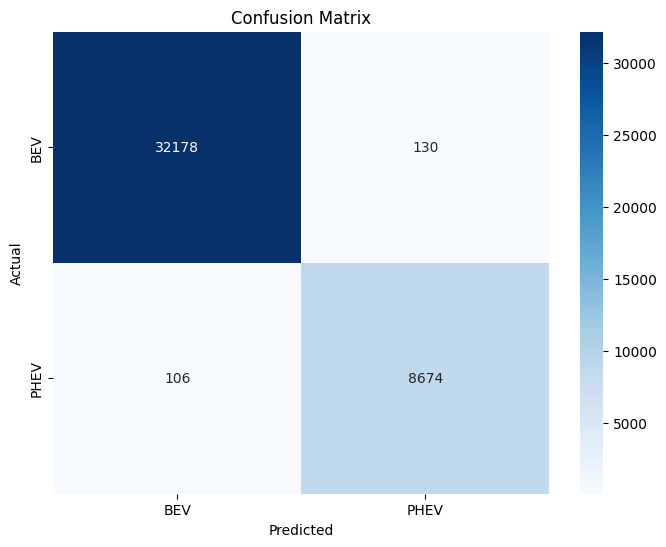

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# Step 1: Check unique values in y_train and y_test
print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_test:", np.unique(y_test))

# Step 2: Use LabelEncoder to convert string labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Fit and transform y_train
y_test_encoded = label_encoder.transform(y_test)        # Only transform y_test

# Step 3: Define the model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_pca.shape[1],)),  # 1st hidden layer
    layers.Dense(64, activation='relu'),  # 2nd hidden layer
    layers.Dense(32, activation='relu'),  # 3rd hidden layer
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use binary cross-entropy for binary classification
              metrics=['accuracy'])

# Step 4: Implement Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
try:
    history = model.fit(X_train_pca, y_train_encoded, epochs=20, batch_size=32,
                        validation_split=0.2, callbacks=[early_stopping])
except Exception as e:
    print("An error occurred during model training:", str(e))

# Step 5: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_pca, y_test_encoded)
print(f'Test accuracy: {test_accuracy:.4f}')

# Step 6: Generate predictions
y_pred_prob = model.predict(X_test_pca)  # Get predicted probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

# Step 7: Create confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
